In [94]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
train_dir ='/content/drive/MyDrive/Fruit/Train'
val_dir = '/content/drive/MyDrive/Fruit/Valid'

batch_size = 120
IMG_SHAPE = 150 

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE)
                                                )

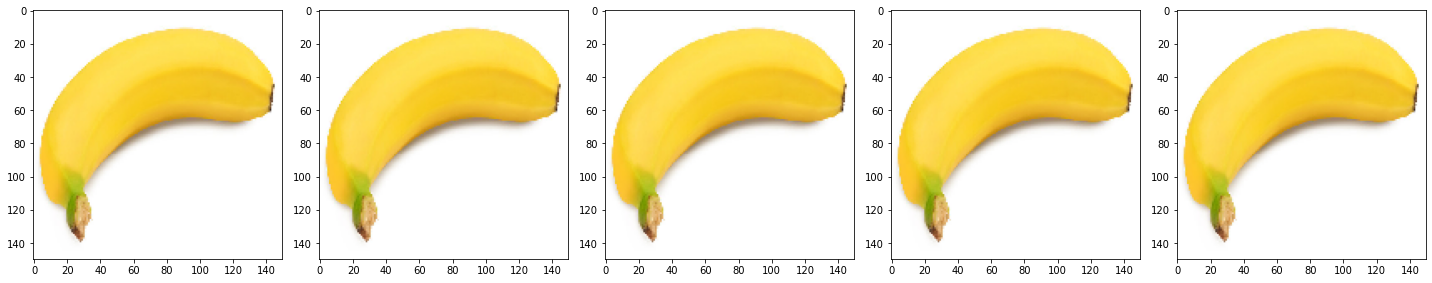

In [98]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

In [ ]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE, IMG_SHAPE)
                                                )

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

In [103]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [104]:
epochs = 40

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
1/1 [==============================] - 2s 2s/step - loss: 1.6454 - accuracy: 0.2025 - val_loss: 7.1716 - val_accuracy: 0.3134
Epoch 2/40
1/1 [==============================] - 1s 951ms/step - loss: 6.4259 - accuracy: 0.3797 - val_loss: 1.7015 - val_accuracy: 0.4030
Epoch 3/40
1/1 [==============================] - 1s 972ms/step - loss: 1.7704 - accuracy: 0.3544 - val_loss: 1.7254 - val_accuracy: 0.2090
Epoch 4/40
1/1 [==============================] - 1s 982ms/step - loss: 1.8085 - accuracy: 0.1899 - val_loss: 1.6850 - val_accuracy: 0.2836
Epoch 5/40
1/1 [==============================] - 1s 980ms/step - loss: 1.6919 - accuracy: 0.1772 - val_loss: 1.6416 - val_accuracy: 0.3284
Epoch 6/40
1/1 [==============================] - 1s 998ms/step - loss: 1.6066 - accuracy: 0.3291 - val_loss: 1.6129 - val_accuracy: 0.4328
Epoch 7/40
1/1 [==============================] - 1s 974ms/step - loss: 1.5366 - accuracy: 0.4051 - val_loss: 1.6140 - val_accuracy: 0.3134
Epoch 8/40
1/1 [=======

In [105]:
model.save('modelFruit.h5')
from keras.models import load_model
model5 = load_model('modelFruit.h5')

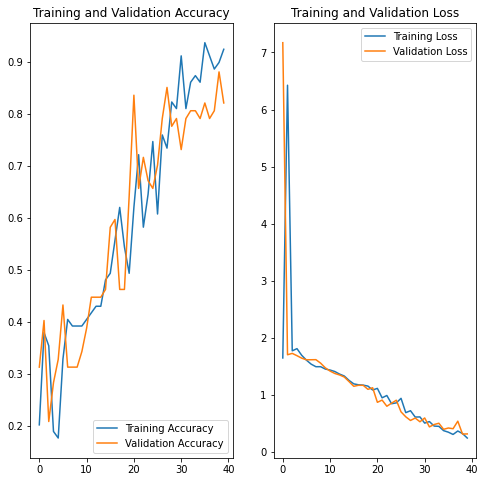

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0.5, 1.0, ' Đây là: Sầu Riêng')

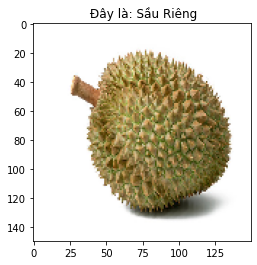

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,save_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt

img = load_img('/content/sr.jpg',target_size=(IMG_SHAPE,IMG_SHAPE,3))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,IMG_SHAPE,IMG_SHAPE,3)
img = img.astype('float64')
Label = ['Chuối','Cà Rốt','Bắp','Sầu Riêng','Dưa leo','Xoài',
         'Bắp Cải','Ớt','Táo','Bí']
#np.argmax(model.predict(img))
plt.title(" Đây là: " + str(Label[np.argmax(model.predict(img))]))